In [1]:
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv").fillna(0)
train_data =train_data.sample(frac=1)

In [3]:
test_data = pd.read_csv("test.csv").fillna(0)
test_data =test_data.sample(frac=1)

In [4]:
merged_data = pd.concat(
    (train_data, test_data),
    axis=0,
    join="outer")

In [5]:
merged_data.head()

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),# Lane Points,% Observed
1480,11/01/2016 3:20,3,1,100
5908,18/02/2016 12:20,90,1,100
2714,15/01/2016 10:10,105,1,100
4013,02/02/2016 22:25,21,1,100
7707,29/02/2016 18:15,91,1,100


In [6]:
train_data = merged_data.sample(frac=0.8,random_state=20)
test_data = merged_data.drop(train_data.index)

In [7]:
attribute = 'Lane 1 Flow (Veh/5 Minutes)'
scaler = MinMaxScaler(feature_range=(0, 1)).fit(train_data[attribute].values.reshape(-1, 1))
train_transform = scaler.transform(train_data[attribute].values.reshape(-1, 1)).reshape(1, -1)[0]
test_transform = scaler.transform(test_data[attribute].values.reshape(-1, 1)).reshape(1, -1)[0]
train, test = [], []
delay = 256
for i in range(delay, len(train_transform)):
    train.append(train_transform[i - delay: i + 1])
for i in range(delay, len(test_transform)):
    test.append(test_transform[i - delay: i + 1])
train = np.array(train)
test = np.array(test)
X_train = train[:, :-1]
y_train = train[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]

In [8]:
y_train

array([0.02538071, 0.46700508, 0.52791878, ..., 0.54314721, 0.56345178,
       0.04060914])

In [9]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))

In [10]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))

In [11]:
X_train.shape

(9421, 256, 1)

In [12]:
X_test.shape

(757, 256, 1)

In [13]:
X_train = tf.transpose(X_train, [0, 2, 1])
X_test = tf.transpose(X_test, [0, 2, 1])

In [41]:
model = models.Sequential()
model = models.Sequential()
model.add(layers.Conv1D(256, 1, activation='relu', input_shape=(1, 256)))
model.add(tf.keras.layers.LeakyReLU())
model.add(layers.Conv1D(64, 1, activation='relu',  input_shape=(256, 64)))
model.add(layers.Conv1D(64, 1, activation='relu',  input_shape=(128, 16)))
model.add(layers.Conv1D(64, 1, activation='relu',  input_shape=(64, 8)))
model.add(layers.Dropout(.2, input_shape=(4,8)))
model.add(layers.MaxPooling1D(1))
model.add(layers.Conv1D(64, 1, activation='relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 1, 256)            65792     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 256)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1, 64)             16448     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1, 64)             4160      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 1, 64)             4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)            

In [44]:
model.compile(optimizer='Adadelta',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [45]:
history = model.fit(X_train, y_train, batch_size = 32, epochs=100, shuffle=True,verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
293/295 [============================>.] - ETA: 0s - loss: 0.0015   WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x176f34ca0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and atta

Epoch 59/100
295/295 [==============================] - 0s 941us/step - loss: 6.4715e-04 - val_loss: 4.8644e-07
Epoch 60/100
295/295 [==============================] - 0s 924us/step - loss: 0.0027 - val_loss: 4.7605e-07
Epoch 61/100
295/295 [==============================] - 0s 983us/step - loss: 0.0017 - val_loss: 4.6818e-07
Epoch 62/100
295/295 [==============================] - 0s 969us/step - loss: 0.0109 - val_loss: 4.6188e-07
Epoch 63/100
295/295 [==============================] - 0s 979us/step - loss: 0.0016 - val_loss: 4.5400e-07
Epoch 64/100
295/295 [==============================] - 0s 954us/step - loss: 0.0011 - val_loss: 4.4644e-07
Epoch 65/100
295/295 [==============================] - 0s 946us/step - loss: 1.6066e-04 - val_loss: 4.3589e-07
Epoch 66/100
295/295 [==============================] - 0s 935us/step - loss: 0.0036 - val_loss: 4.3007e-07
Epoch 67/100
295/295 [==============================] - 0s 954us/step - loss: 0.0069 - val_loss: 4.2093e-07
Epoch 68/100
295/295

In [46]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


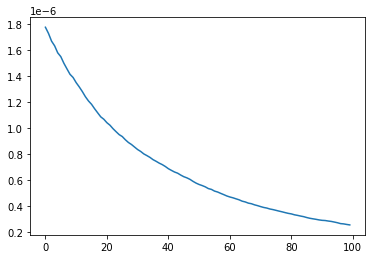

In [47]:
plt.plot(history.history['val_loss'])